In [1]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer
import torch

In [2]:
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"

In [3]:
model = BertForQuestionAnswering.from_pretrained(model_name)

config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
tokenizer = BertTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### Embeddings


In [5]:
question = "What is the name of the model?"
context = "BERT is a pre-trained model developed by Google for natural language processing tasks."

In [6]:
encoding = tokenizer.encode_plus(text=question, text_pair=context)

In [7]:
print(encoding)

{'input_ids': [101, 2054, 2003, 1996, 2171, 1997, 1996, 2944, 1029, 102, 14324, 2003, 1037, 3653, 1011, 4738, 2944, 2764, 2011, 8224, 2005, 3019, 2653, 6364, 8518, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [8]:
inputs = encoding["input_ids"]
sentence_embeddings = encoding["token_type_ids"]
tokens = tokenizer.convert_ids_to_tokens(inputs)

In [12]:
tokenizer.decode(101)

'[CLS]'

In [10]:
tokenizer.decode(102)

'[SEP]'

In [13]:
output = model(
    input_ids=torch.tensor([inputs]),
    token_type_ids=torch.tensor([sentence_embeddings]),
    return_dict=True,
)

### Model output


In [14]:
start_index = torch.argmax(output.start_logits)
end_index = torch.argmax(output.end_logits)

print(start_index, end_index)

tensor(10) tensor(10)


In [15]:
answer = " ".join(tokens[start_index : end_index + 1])
print(answer)

bert


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
s_scores = output.start_logits.detach().numpy().flatten()
e_scores = output.end_logits.detach().numpy().flatten()

In [ ]:
token_labels = []
for i, token in enumerate(tokens):
    token_labels.append(f"{token} - {i}")

/var/folders/0x/7sbtn28900ndzns673ksz6ww0000gn/T/ipykernel_6151/1538046351.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


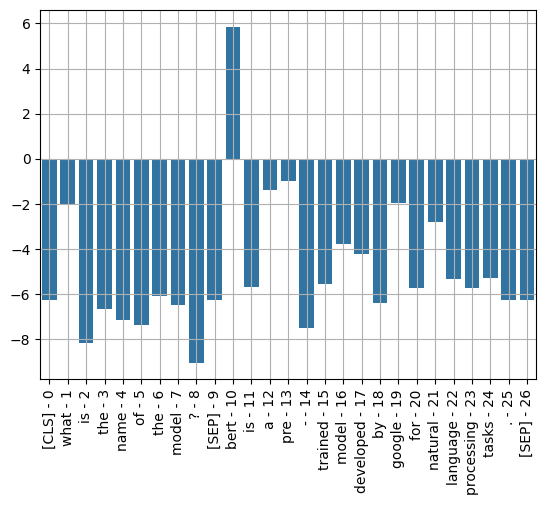

In [23]:
ax = sns.barplot(x=token_labels, y=s_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)

### Question Answering


In [32]:
sunset_motors_context = "Sunset Motors, founded in 1996, is a leading manufacturer of electric vehicles. The company is headquartered in Palo Alto, California, and has a global presence with manufacturing facilities in the United States, China, and Germany. Sunset Motors is known for its innovative technology, including advanced battery systems and autonomous driving capabilities. The company's mission is to accelerate the world's transition to sustainable energy through the production of high-quality electric vehicles that are both environmentally friendly and affordable. Sunset Motors has received numerous awards for its contributions to the automotive industry and continues to invest heavily in research and development to maintain its position as a market leader. Only Volkswagen cars are sold at Sunset Motors dealerships."

In [33]:
def faq_bot(question):
    context = sunset_motors_context
    input_ids = tokenizer.encode(question, context)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    sep_idx = input_ids.index(tokenizer.sep_token_id)
    num_seg_a = sep_idx + 1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0] * num_seg_a + [1] * num_seg_b
    output = model(
        input_ids=torch.tensor([input_ids]),
        token_type_ids=torch.tensor([segment_ids]),
        return_dict=True,
    )
    start_index = torch.argmax(output.start_logits)
    end_index = torch.argmax(output.end_logits)
    if end_index >= start_index:
        answer = " ".join(tokens[start_index : end_index + 1])
    else:
        answer = "I am unable to find the answer to your question."

    corrected_answer = answer.replace(" ##", "").replace("##", "")
    return corrected_answer

In [34]:
faq_bot("Where is Sunset Motors headquartered?")

'palo alto , california'

In [35]:
faq_bot("What models are sold at Sunset Motors dealerships?")

'volkswagen cars'

In [36]:
faq_bot("What marks the founding year of Sunset Motors?")

'1996'

In [37]:
faq_bot("What manufacturer produces electric vehicles?")

'sunset motors'

In [38]:
faq_bot("What brand of cars are sold at Sunset Motors dealerships?")

'volkswagen'

In [39]:
faq_bot("what type of vehicles does Sunset Motors specialize in?")

'electric'

### RoBERTa and DistilBERT


In [1]:
from transformers import RobertaTokenizer, RobertaForQuestionAnswering

model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForQuestionAnswering.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForQuestionAnswering were not initialized from the model checkpoint at roberta-base and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
from transformers import DistilBertTokenizer, DistilBertForQuestionAnswering

model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForQuestionAnswering.from_pretrained(model_name)

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: b969bf9b-ad11-46eb-8f7f-305870317827)')' thrown while requesting HEAD https://huggingface.co/distilbert-base-uncased/resolve/main/tokenizer_config.json
Retrying in 1s [Retry 1/5].


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
